


*   Objective definition & Data collection
*   Data preprocessing
*   Feature engineering
*   Modeling and Evaluation
*   Presentation and communication




# Objective definition & Data collection

# 1. Import needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.layers import Embedding, BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# 2. Read and Data preprocessing

### 2.1 Read data

โหลดข้อมูล: ใช้ pd.read_csv เพื่อโหลดข้อมูลจากไฟล์ .txt โดยแต่ละไฟล์มีการระบุ delimiter=';' เพื่อแบ่งข้อมูลในแต่ละบรรทัดตามเครื่องหมายกำกับ (;) และกำหนด header=None ซึ่งหมายความว่าไฟล์ไม่มีหัวตารางหรือชื่อคอลัมน์ในบรรทัดแรก ตามด้วยการกำหนดชื่อคอลัมน์เป็น ['sentence', 'label']

In [ ]:
from google.colab import drive
import pandas as pd

# เชื่อมต่อกับ Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# ชุดข้อมูลที่ 1

In [ ]:
import pandas as pd

# อัปเดต path ของไฟล์ให้ตรงกับตำแหน่งที่ไฟล์ข้อมูลถูกเก็บ
df = pd.read_csv("/content/drive/MyDrive/nlp_ความรู้สึก/train.txt", delimiter=';', header=None, names=['sentence', 'label'])
val_df = pd.read_csv("/content/drive/MyDrive/nlp_ความรู้สึก/val.txt", delimiter=';', header=None, names=['sentence', 'label'])
test_df = pd.read_csv("/content/drive/MyDrive/nlp_ความรู้สึก/test.txt", delimiter=';', header=None, names=['sentence', 'label'])


# ตรวจสอบหัวข้อแรกของแต่ละ DataFrame เพื่อยืนยันว่าข้อมูลถูกโหลดเข้ามาอย่างถูกต้อง
print(df.head())
print(val_df.head())
print(test_df.head())

print()
# แสดงชื่อคลาสทั้งหมดที่มีในชุดข้อมูล
all_labels = pd.concat([df['label'], val_df['label'], test_df['label']])
unique_labels = all_labels.unique()
print(unique_labels)

                                            sentence    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
                                            sentence    label
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy
                                            sentence    label
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i lef

In [ ]:
total_rows = df.shape[0]  # จำนวนแถวทั้งหมดใน DataFrame df
val_rows = val_df.shape[0]  # จำนวนแถวทั้งหมดใน DataFrame val_df
test_rows = test_df.shape[0]  # จำนวนแถวทั้งหมดใน DataFrame test_df

# คำนวณเปอร์เซ็นต์ของแต่ละชุดข้อมูล
df_percentage = (total_rows / (total_rows + val_rows + test_rows)) * 100
val_percentage = (val_rows / (total_rows + val_rows + test_rows)) * 100
test_percentage = (test_rows / (total_rows + val_rows + test_rows)) * 100

print("เปอร์เซ็นต์ของ training set:", df_percentage, "%")
print("เปอร์เซ็นต์ของ validation set:", val_percentage, "%")
print("เปอร์เซ็นต์ของ in test set:", test_percentage, "%")
print()
print("จำนวนแถวในชุดข้อมูล Train:", total_rows)
print("จำนวนแถวในชุดข้อมูล Validation:", val_rows)
print("จำนวนแถวในชุดข้อมูล Test:", test_rows)

เปอร์เซ็นต์ของ training set: 80.0 %
เปอร์เซ็นต์ของ validation set: 10.0 %
เปอร์เซ็นต์ของ in test set: 10.0 %

จำนวนแถวในชุดข้อมูล Train: 16000
จำนวนแถวในชุดข้อมูล Validation: 2000
จำนวนแถวในชุดข้อมูล Test: 2000


# ชุดข้อมูลที่ 2

In [ ]:
import pandas as pd

# อ่านไฟล์ CSV
file_path = "/content/drive/MyDrive/nlp_ความรู้สึก/emotion_sentimen_dataset.csv"
df_add = pd.read_csv(file_path)
df_add.columns = ['index', 'sentence', 'label']  # กำหนดชื่อคอลัมน์ใหม่
df_add = df_add[['sentence', 'label']]  # เลือกเฉพาะคอลัมน์ 'sentence' และ 'label'
print(df_add)
print()
# แสดงชื่อคลาสทั้งหมดที่มีในชุดข้อมูล
unique_labels2 = df_add['label'].unique()
print(unique_labels2)

                                                 sentence    label
0       i seriously hate one subject to death but now ...     hate
1                      im so full of life i feel appalled  neutral
2       i sit here to write i start to dig out my feel...  neutral
3       ive been really angry with r and i feel like a...    anger
4       i feel suspicious if there is no one outside l...  neutral
...                                                   ...      ...
839550  i feel like telling these horny devils to find...  neutral
839551  i began to realize that when i was feeling agi...  neutral
839552  i feel very curious be why previous early dawn...  neutral
839553  i feel that becuase of the tyranical nature of...  neutral
839554  i think that after i had spent some time inves...  neutral

[839555 rows x 2 columns]

['hate' 'neutral' 'anger' 'love' 'worry' 'relief' 'happiness' 'fun'
 'empty' 'enthusiasm' 'sadness' 'surprise' 'boredom']


In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งชุดข้อมูลออกเป็น train/validation/test sets
train_data, test_val_data = train_test_split(df_add, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_val_data, test_size=0.5, random_state=42)

# แสดงจำนวนข้อมูลในแต่ละชุด
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))


Training set size: 671644
Validation set size: 83955
Test set size: 83956


**เพื่อรวมข้อมูลจากสองชุดเข้าด้วยกันให้เป็นหนึ่งชุดข้อมูลใหญ่**

In [ ]:
# รวม DataFrame ของชุดข้อมูล train, val, และ test พร้อมกับชุดข้อมูลจาก df_add
merged_data = pd.concat([df, val_df, test_df, df_add])

# ตรวจสอบข้อมูลในชุดข้อมูลที่รวมเข้าด้วยกัน
print(merged_data.head())
print()

# ตรวจสอบขนาดของชุดข้อมูลที่รวมเข้าด้วยกัน
print('เราก็จะได้ชุดข้อมูลเก่า 20,000 + 839,555 ชุดข้อมูลใหม่')
print("Total rows in merged data:", len(merged_data))


                                            sentence    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

เราก็จะได้ชุดข้อมูลเก่า 20,000 + 839,555 ชุดข้อมูลใหม่
Total rows in merged data: 859555


In [ ]:
merged_data

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
839550,i feel like telling these horny devils to find...,neutral
839551,i began to realize that when i was feeling agi...,neutral
839552,i feel very curious be why previous early dawn...,neutral
839553,i feel that becuase of the tyranical nature of...,neutral


# Feature engineering

นับจำนวนความถี่ของค่าที่ปรากฏในคอลัมน์ 'label' ของ DataFrame

In [ ]:
merged_data.label.value_counts()

label
neutral       674538
love           41194
happiness      27175
sadness        23278
relief         16729
hate           15267
anger          15045
fun            10075
enthusiasm      9304
surprise        7673
joy             6761
empty           5542
worry           4475
fear            2373
boredom          126
Name: count, dtype: int64

แสดงการกระจายของความถี่ของแต่ละประเภทของ label ในข้อมูลที่ถูกโหลดเข้ามา

<ipython-input-10-0ed371ffe7c8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts, x='label', y='count', palette='husl')


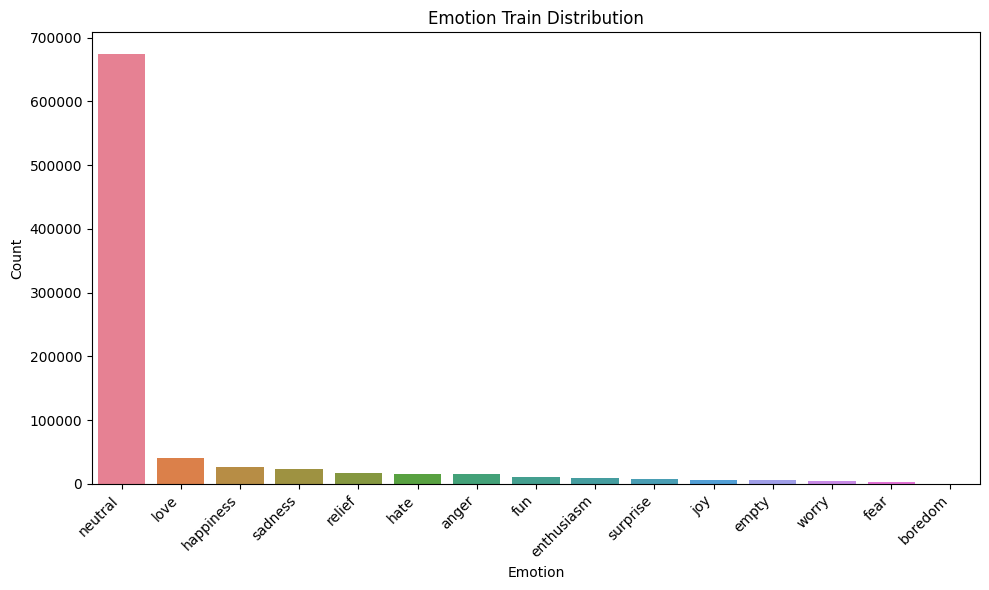

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame ของ label counts
label_counts = merged_data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# เรียงลำดับข้อมูลตามจำนวน label จากมากไปหน้อย
label_counts = label_counts.sort_values(by='count', ascending=False)

# สร้างกราฟ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='label', y='count', palette='husl')
plt.title('Emotion Train Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ข้อมูลไม่สมดุลกันระหว่างคลาส เราเลยทำการลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame

In [ ]:
merged_data = merged_data[merged_data['label'] != 'neutral']
merged_data = merged_data[merged_data['label'] != 'relief']
merged_data = merged_data[merged_data['label'] != 'empty']
merged_data = merged_data[merged_data['label'] != 'love']
merged_data = merged_data[merged_data['label'] != 'enthusiasm']
merged_data = merged_data[merged_data['label'] != 'surprise']
merged_data = merged_data[merged_data['label'] != 'boredom']


merged_data.label.value_counts()

label
happiness    27175
sadness      23278
hate         15267
anger        15045
fun          10075
joy           6761
worry         4475
fear          2373
Name: count, dtype: int64

In [ ]:
# รวมคอลัมน์ 'worry' และ 'fear' ในคอลัมน์ 'fear'
merged_data.loc[merged_data['label'] == 'worry', 'label'] = 'fear'

# รวมคอลัมน์ 'joy' และ 'fun' ในคอลัมน์ 'joy'
merged_data.loc[merged_data['label'] == 'fun', 'label'] = 'joy'

# ตรวจสอบข้อมูลหลังจากการรวม
print(merged_data['label'].value_counts())


label
happiness    27175
sadness      23278
joy          16836
hate         15267
anger        15045
fear          6848
Name: count, dtype: int64


<ipython-input-13-0ed371ffe7c8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts, x='label', y='count', palette='husl')


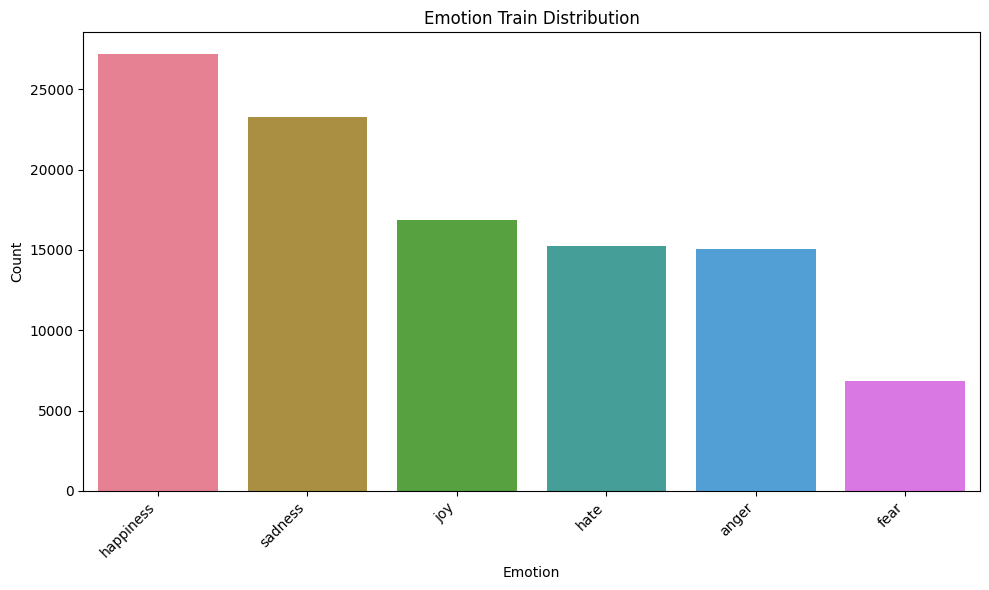

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame ของ label counts
label_counts = merged_data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# เรียงลำดับข้อมูลตามจำนวน label จากมากไปหน้อย
label_counts = label_counts.sort_values(by='count', ascending=False)

# สร้างกราฟ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='label', y='count', palette='husl')
plt.title('Emotion Train Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งชุดข้อมูล train เป็น train 80% และ validation 20%
train_data, val_data = train_test_split(merged_data, test_size=0.2, random_state=42)

# แบ่งชุดข้อมูล test เป็น test 50% และ validation 50%
test_data, val_data = train_test_split(val_data, test_size=0.5, random_state=42)

# แสดงจำนวนข้อมูลหลังจากแบ่ง
print("จำนวนข้อมูลในชุด train:", len(train_data))
print("จำนวนข้อมูลในชุด validation:", len(val_data))
print("จำนวนข้อมูลในชุด test:", len(test_data))


จำนวนข้อมูลในชุด train: 83559
จำนวนข้อมูลในชุด validation: 10445
จำนวนข้อมูลในชุด test: 10445


สร้างกราฟวงกลมเพื่อแสดงการกระจายของความถี่ของแต่ละประเภทของ label ในชุดข้อมูล train

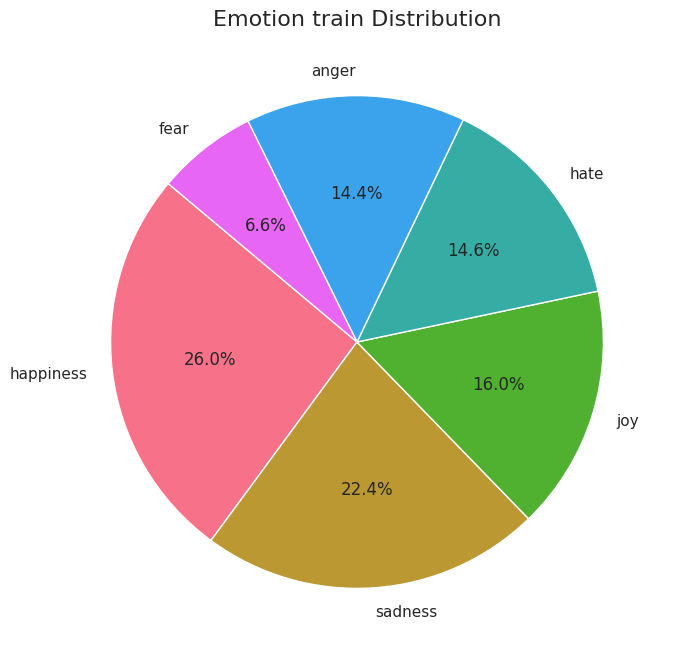

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# นับจำนวนประเภทของ label ในชุดข้อมูล train_data
label_counts = train_data['label'].value_counts()

# สร้างสีแบบ husl สำหรับกราฟ
light_colors = sns.color_palette("husl", len(label_counts))

# ตั้งค่าสไตล์ของกราฟ
sns.set(style="whitegrid")

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)

# เพิ่มหัวข้อและปรับขนาดตัวอักษร
plt.title('Emotion train Distribution', fontsize=16)

# แสดงกราฟ
plt.show()


สร้างกราฟวงกลมเพื่อแสดงการกระจายของความถี่ของแต่ละประเภทของ label ในชุดข้อมูล validation

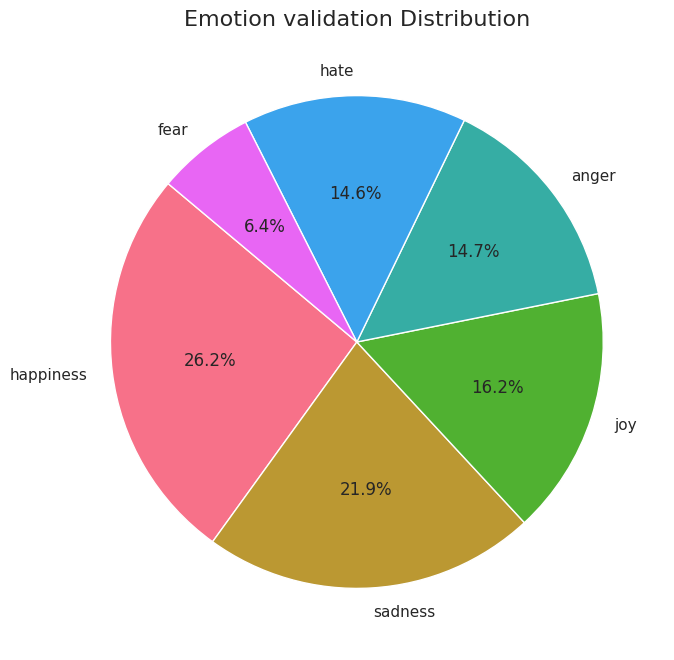

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# นับจำนวนประเภทของ label ในชุดข้อมูล val_data
label_counts = val_data['label'].value_counts()

# สร้างสีแบบ husl สำหรับกราฟ
light_colors = sns.color_palette("husl", len(label_counts))

# ตั้งค่าสไตล์ของกราฟ
sns.set(style="whitegrid")

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)

# เพิ่มหัวข้อและปรับขนาดตัวอักษร
plt.title('Emotion validation Distribution', fontsize=16)

# แสดงกราฟ
plt.show()


สร้างกราฟวงกลมเพื่อแสดงการกระจายของความถี่ของแต่ละประเภทของ label ในชุดข้อมูล test

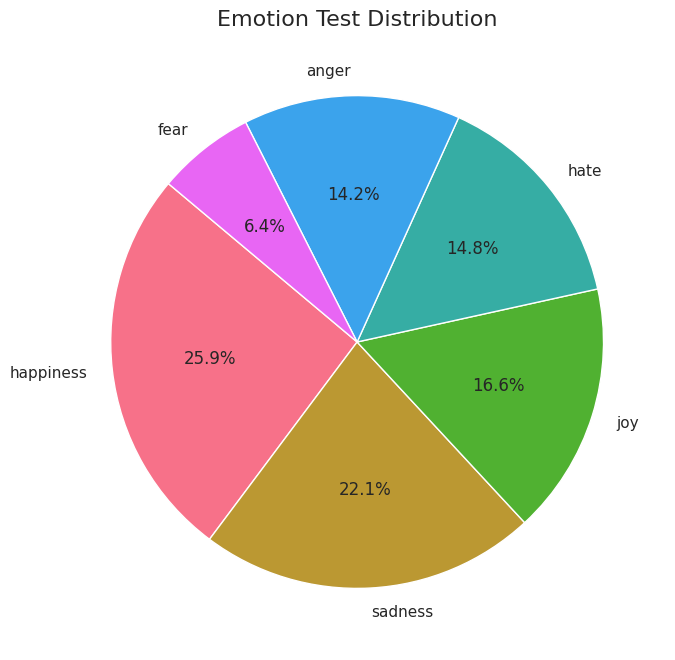

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# นับจำนวนประเภทของ label ในชุดข้อมูล test
label_counts = test_data['label'].value_counts()

# สร้างสีแบบ husl สำหรับกราฟ
light_colors = sns.color_palette("husl", len(label_counts))

# ตั้งค่าสไตล์ของกราฟ
sns.set(style="whitegrid")

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)

# เพิ่มหัวข้อและปรับขนาดตัวอักษร
plt.title('Emotion Test Distribution', fontsize=16)

# แสดงกราฟ
plt.show()


In [ ]:
# นับจำนวนตัวอย่างในแต่ละกลุ่มของ label
label_counts = merged_data['label'].value_counts()

# กำหนดจำนวนตัวอย่างที่ต้องการสุ่มในแต่ละกลุ่ม (เท่ากับจำนวนตัวอย่างน้อยที่สุดในกลุ่ม)
min_samples = label_counts.min()

# สร้าง DataFrame ว่างเพื่อเก็บชุดข้อมูลที่จะสุ่ม
sampled_data = pd.DataFrame()

# สุ่มตัวอย่างจากแต่ละกลุ่มและรวมเข้าด้วยกัน
for label in label_counts.index:
    label_data = merged_data[merged_data['label'] == label].sample(min_samples, random_state=42)
    sampled_data = pd.concat([sampled_data, label_data])

# แสดงขนาดของชุดข้อมูลหลังจากสุ่มแล้ว
print("จำนวนข้อมูลหลังจากสุ่มแต่ละกลุ่มเท่ากัน:", len(sampled_data))


จำนวนข้อมูลหลังจากสุ่มแต่ละกลุ่มเท่ากัน: 41088


In [ ]:
# นับจำนวนตัวอย่างในแต่ละกลุ่มของ label ในชุดข้อมูลที่สุ่มแล้ว
sampled_label_counts = sampled_data['label'].value_counts()

# แสดงจำนวนตัวอย่างในแต่ละกลุ่มของ label
print("จำนวนตัวอย่างในแต่ละกลุ่มของ label ในชุดข้อมูลที่สุ่มแล้ว:")
print(sampled_label_counts)


จำนวนตัวอย่างในแต่ละกลุ่มของ label ในชุดข้อมูลที่สุ่มแล้ว:
label
happiness    6848
sadness      6848
joy          6848
hate         6848
anger        6848
fear         6848
Name: count, dtype: int64


# แสดงการกระจายของความถี่ของแต่ละประเภทของ label ในอีกครั้ง

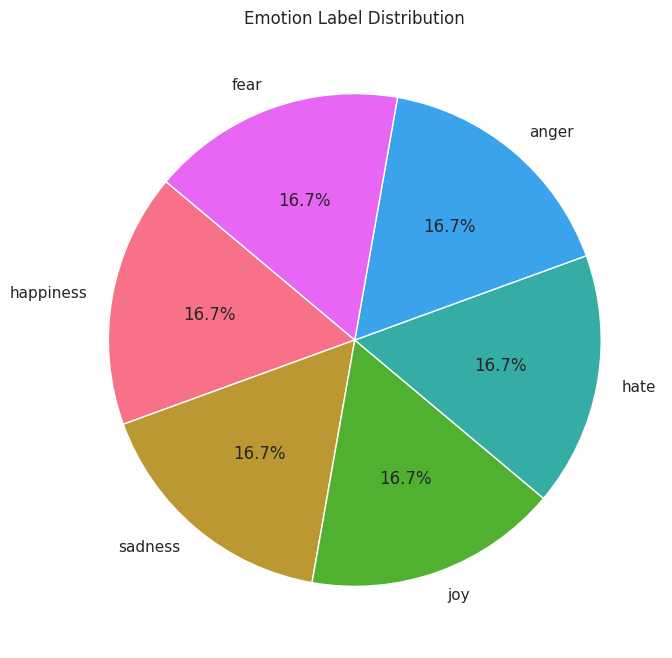

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# นับจำนวนความถี่ของแต่ละประเภทของ label
label_counts = sampled_data['label'].value_counts()

# สร้างโทนสีแบบเรียบๆ
light_colors = sns.husl_palette(n_colors=len(label_counts))

# ตั้งค่ารูปแบบกราฟ
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

# สร้าง Pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)

# ตั้งหัวเรื่อง
plt.title('Emotion Label Distribution')

# แสดงกราฟ
plt.show()


In [ ]:
sampled_data

,sentence,label
641274,i am tired but content and i feel more peacefu...,happiness
702762,i feel content w,happiness
590400,i bought a christmas tree the other day just t...,happiness
709849,i feel envious of happy people,happiness
764768,i have made a conscientious effort to continue...,happiness
...,...,...
254959,i know i should remain hopeful and keep fighti...,fear
520579,i feel like if i want to go on with life witho...,fear
528688,i know i usually feel unbelievably overwhelmed...,fear
561129,i feel completely helpless and worry stricken,fear


In [ ]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็น train 80% และ temp 20%
train_data, temp_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

# แบ่งข้อมูล temp เป็น validation 50% และ test 50%
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# แสดงจำนวนข้อมูลหลังจากแบ่ง
print("จำนวนข้อมูลในชุด train:", len(train_data))
print("จำนวนข้อมูลในชุด validation:", len(val_data))
print("จำนวนข้อมูลในชุด test:", len(test_data))


จำนวนข้อมูลในชุด train: 32870
จำนวนข้อมูลในชุด validation: 4109
จำนวนข้อมูลในชุด test: 4109


แสดงการกระจายของความถี่ของแต่ละประเภทของ label ในอีกครั้ง

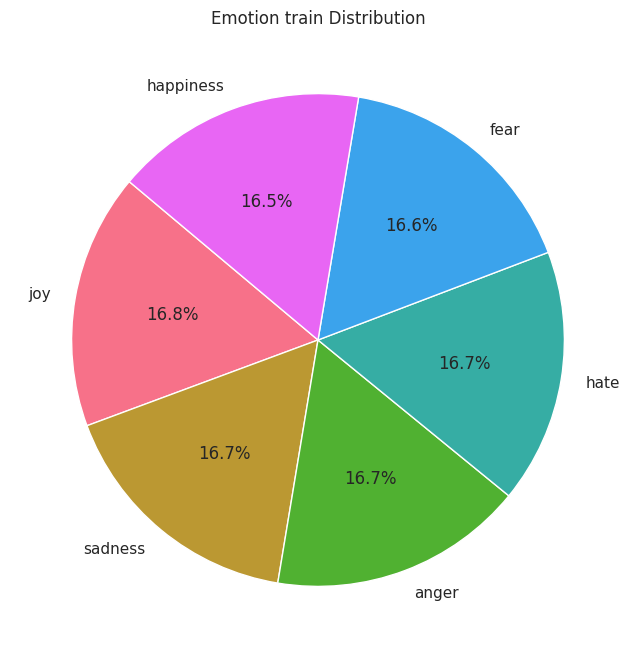

In [ ]:
label_counts = train_data['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion train Distribution')
plt.show()

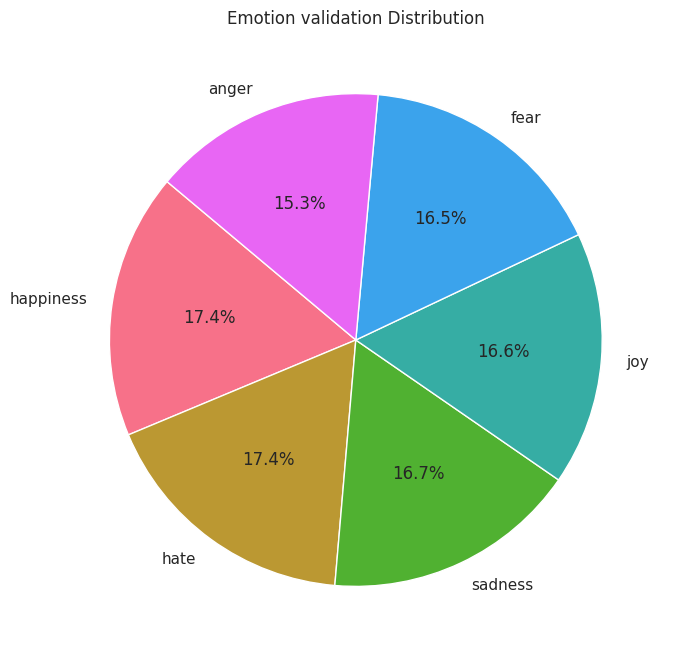

In [ ]:
label_counts = val_data['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion validation Distribution')
plt.show()

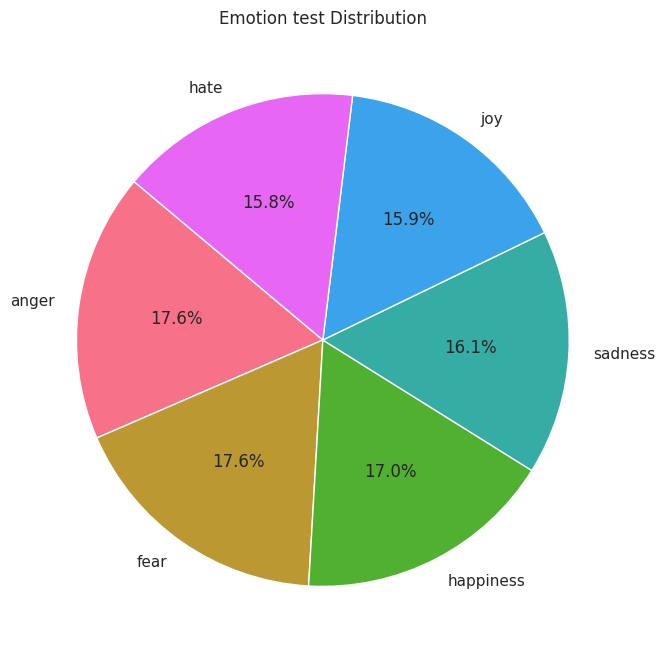

In [ ]:
label_counts = test_data['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion test Distribution')
plt.show()

# Split data into X, y

ทำการแยกข้อมูลเป็นสองคอลัมน์คือ 'sentence' และ 'label' จาก DataFrame สำหรับ train, validation, และ test set

In [ ]:
# สำหรับชุดข้อมูล train
train_sentences = train_data['sentence'].tolist()
train_labels = train_data['label'].tolist()

# สำหรับชุดข้อมูล validation
val_sentences = val_data['sentence'].tolist()
val_labels = val_data['label'].tolist()

# สำหรับชุดข้อมูล test
test_sentences = test_data['sentence'].tolist()
test_labels = test_data['label'].tolist()


# Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

# สร้าง object ของ LabelEncoder
encoder = LabelEncoder()

# Encoding labels สำหรับชุดข้อมูล train
train_labels_encoded = encoder.fit_transform(train_labels)

# Encoding labels สำหรับชุดข้อมูล validation
val_labels_encoded = encoder.transform(val_labels)

# Encoding labels สำหรับชุดข้อมูล test
test_labels_encoded = encoder.transform(test_labels)

# แสดงผลลัพธ์
print("Encoded labels for train data:", train_labels_encoded)
print("Encoded labels for validation data:", val_labels_encoded)
print("Encoded labels for test data:", test_labels_encoded)

# แสดงคำที่ถูก Encoding และค่า Encoding สำหรับชุดข้อมูล train
print("Encoding mapping for train data:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Encoded labels for train data: [5 5 0 ... 1 2 4]
Encoded labels for validation data: [1 2 1 ... 1 2 0]
Encoded labels for test data: [4 0 0 ... 4 0 3]
Encoding mapping for train data:
{'anger': 0, 'fear': 1, 'happiness': 2, 'hate': 3, 'joy': 4, 'sadness': 5}


# Text preprocessing

In [ ]:
# num_words=10000 เพื่อกำหนดจำนวนคำที่จะใช้ในการแปลงข้อความเป็นตัวเลข
# ในที่นี้กำหนดให้ใช้เฉพาะคำที่ถูกเรียกออกมาบ่อยที่สุด 10,000 คำแรกเท่านั้น
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_sentences)

# ใช้ข้อมูลจาก train_sentences เพื่อเรียนรู้คำศัพท์
# แปลงข้อความใน train_sentences เป็นลำดับของตัวเลขตามดัชนีคำศัพท์ที่ได้สร้างขึ้น
sequences = tokenizer.texts_to_sequences(train_sentences)

# ทำการเติมค่าศูนย์ (zero-padding) เข้าไปให้ทุกลำดับมีความยาวเท่ากัน โดยกำหนดให้ลำดับมีความยาวสูงสุดไม่เกิน 50 คำ
tr_x = pad_sequences(sequences, maxlen=50)

# แปลงป้ายกำกับของชุดข้อมูล train เป็นรูปแบบ One-hot encoding โดยใช้ to_categorical() จาก Keras
tr_y = to_categorical(train_labels_encoded)

# ทำขั้นตอนเดียวกันกับชุดข้อมูล validation และ test set
sequences = tokenizer.texts_to_sequences(val_sentences)
val_x = pad_sequences(sequences, maxlen=50)
val_y = to_categorical(val_labels_encoded)

sequences = tokenizer.texts_to_sequences(test_sentences)
ts_x = pad_sequences(sequences, maxlen=50)
ts_y = to_categorical(test_labels_encoded )

# Building deep learning model


พารามิเตอร์ที่จะใช้ในการสร้างโมเดล Deep Learning ที่ใช้ในการจัดการกับข้อมูลที่ถูกแปลงจากข้อความเป็นลำดับของตัวเลขด้วย Tokenizer และ pad_sequences

In [ ]:
max_words = 10000 # จำนวนคำที่มีในดัชนีคำศัพท์ ในกรณีนี้เรากำหนดให้มีคำศัพท์สูงสุดไม่เกิน 10,000 คำ
max_len = 50 # ความยาวสูงสุดของลำดับของคำ ในกรณีนี้เรากำหนดให้ไม่เกิน 50 คำ
embedding_dim = 32 # ขนาดของเวกเตอร์ฝังหรือความยาวของพวกน้ำหนักที่เราจะใช้ในการเข้ารหัสคำ ในที่นี้เรากำหนดให้มีขนาด 32 หลัก

ต่อไปเราจะสร้างโมเดล Deep Learning โดยใช้พารามิเตอร์เหล่านี้เพื่อจัดการกับข้อมูลข้อความที่เรามีในรูปแบบลำดับของตัวเลขแล้ว

# **Model architecture**

โมเดล Deep Learning ที่กำลังสร้างขึ้นนี้มีโครงสร้างที่ประกอบด้วย

In [ ]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, ReLU

# Branch 1
input1 = Input(shape=(max_len,))
branch1 = Embedding(max_words, embedding_dim)(input1)  # ไม่ต้องระบุ input_length ที่นี่
branch1 = Conv1D(64, 3, padding='same', activation='relu')(branch1)
branch1 = BatchNormalization()(branch1)
branch1 = ReLU()(branch1)
branch1 = Dropout(0.5)(branch1)
branch1 = GlobalMaxPooling1D()(branch1)

# Branch 2
input2 = Input(shape=(max_len,))
branch2 = Embedding(max_words, embedding_dim)(input2)  # ไม่ต้องระบุ input_length ที่นี่
branch2 = Conv1D(64, 3, padding='same', activation='relu')(branch2)
branch2 = BatchNormalization()(branch2)
branch2 = ReLU()(branch2)
branch2 = Dropout(0.5)(branch2)
branch2 = GlobalMaxPooling1D()(branch2)

# Merge branches
concatenated = Concatenate()([branch1, branch2])

# Dense layers
hid_layer = Dense(128, activation='relu')(concatenated)
dropout = Dropout(0.3)(hid_layer)
output_layer = Dense(6, activation='softmax')(dropout)

# Model
model = Model(inputs=[input1, input2], outputs=output_layer)


**model.compile**

In [ ]:
# กำหนด optimizer เป็น 'adamax'
# ซึ่งเป็นตัวอัลกอริทึมการอัปเดตค่า เวท ในโครงข่ายประสาทเทียม, loss function เป็น 'categorical_crossentropy' เนื่องจากเรามีการจำแนกประเภทหลายประเภท
model.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])
#  และ metrics เป็น ['accuracy', Precision(), Recall()] เพื่อตรวจสอบประสิทธิภาพของโมเดลในแต่ละรอบการฝึก.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 50, 32)               320000    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 50, 32)               320000    ['input_2[0][0]']             
                                                                                              

# Traning the model

In [ ]:
batch_size = 256 #  จำนวนตัวอย่างที่ใช้ในแต่ละรอบการฝึก
epochs = 50 #  จำนวนรอบการฝึก

# tr_x และ tr_x: เป็นข้อมูลที่นำเข้าสอนของสองสาขาของโมเดล (Branch 1 และ Branch 2)
history = model.fit([tr_x, tr_x], tr_y, epochs=epochs, batch_size=batch_size,
                    validation_data=([val_x, val_x], val_y))
# ใช้ validation_data เป็นชุดข้อมูลที่ใช้ในการตรวจสอบประสิทธิภาพของโมเดลขณะฝึก

Epoch 1/50
129/129 [==============================] - 17s 100ms/step - loss: 1.6673 - accuracy: 0.3451 - precision: 0.6403 - recall: 0.0928 - val_loss: 1.7266 - val_accuracy: 0.6785 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
129/129 [==============================] - 12s 94ms/step - loss: 0.7953 - accuracy: 0.7295 - precision: 0.8984 - recall: 0.5952 - val_loss: 1.4566 - val_accuracy: 0.8455 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
129/129 [==============================] - 14s 106ms/step - loss: 0.5061 - accuracy: 0.8379 - precision: 0.9242 - recall: 0.7658 - val_loss: 1.0698 - val_accuracy: 0.8917 - val_precision: 0.9910 - val_recall: 0.1614
Epoch 4/50
129/129 [==============================] - 14s 112ms/step - loss: 0.3956 - accuracy: 0.8809 - precision: 0.9373 - recall: 0.8297 - val_loss: 0.6377 - val_accuracy: 0.9146 - val_precision: 0.9782 - val_recall: 0.6994
Epoch 5/50
129/129 [==============================] - 17s 129ms/step - loss: 

In [ ]:
import pandas as pd

# สร้าง DataFrame จากประวัติการฝึก
history_df = pd.DataFrame(history.history)

# บันทึก DataFrame เป็นไฟล์ Excel
history_df.to_excel('training_history_balanced_new.xlsx', index=False)


# Evaluation and Visullize results
4.1 Evaluate the model

ประเมินประสิทธิภาพของโมเดลบนชุดข้อมูลที่กำหนด ในกรณีนี้คือชุดข้อมูลสอน (tr_x, tr_x) โดย model.evaluate() จะคืนค่า loss และ metrics

In [ ]:
(loss, accuracy, percision, recall) = model.evaluate([tr_x, tr_x], tr_y)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(accuracy, 2)}, Precision: {round(percision, 2)}, Recall: {round(recall, 2)}')

1028/1028 [==============================] - 7s 6ms/step - loss: 0.0320 - accuracy: 0.9905 - precision: 0.9913 - recall: 0.9899
Loss: 0.03, Accuracy: 0.99, Precision: 0.99, Recall: 0.99


ประเมินโมเดลบนชุดข้อมูลทดสอบทำให้เรารับค่า loss และ metrics ที่กำหนดในขณะคอมไพล์โมเดล โดยในที่นี้คือ ts_x และ ts_x ที่เป็นชุดข้อมูลทดสอบ

In [ ]:
(loss, accuracy, percision, recall) = model.evaluate([ts_x, ts_x], ts_y)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(accuracy, 2)}, Precision: {round(percision, 2)}, Recall: {round(recall, 2)}')

129/129 [==============================] - 1s 4ms/step - loss: 0.1812 - accuracy: 0.9542 - precision: 0.9580 - recall: 0.9491
Loss: 0.18, Accuracy: 0.95, Precision: 0.96, Recall: 0.95


แสดงรายการของ keys ทั้งหมดที่มีอยู่ในพจนานุกรมของประวัติการฝึก (history) ซึ่งปกติจะรวมถึงค่า loss และ metrics ที่ถูกบันทึกไว้ในแต่ละรอบการฝึกและการตรวจสอบประสิทธิภาพ

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

**Visullize results**

การพล็อตกราฟของค่า loss, accuracy, precision และ recall ของการฝึกและการตรวจสอบประสิทธิภาพของโมเดล

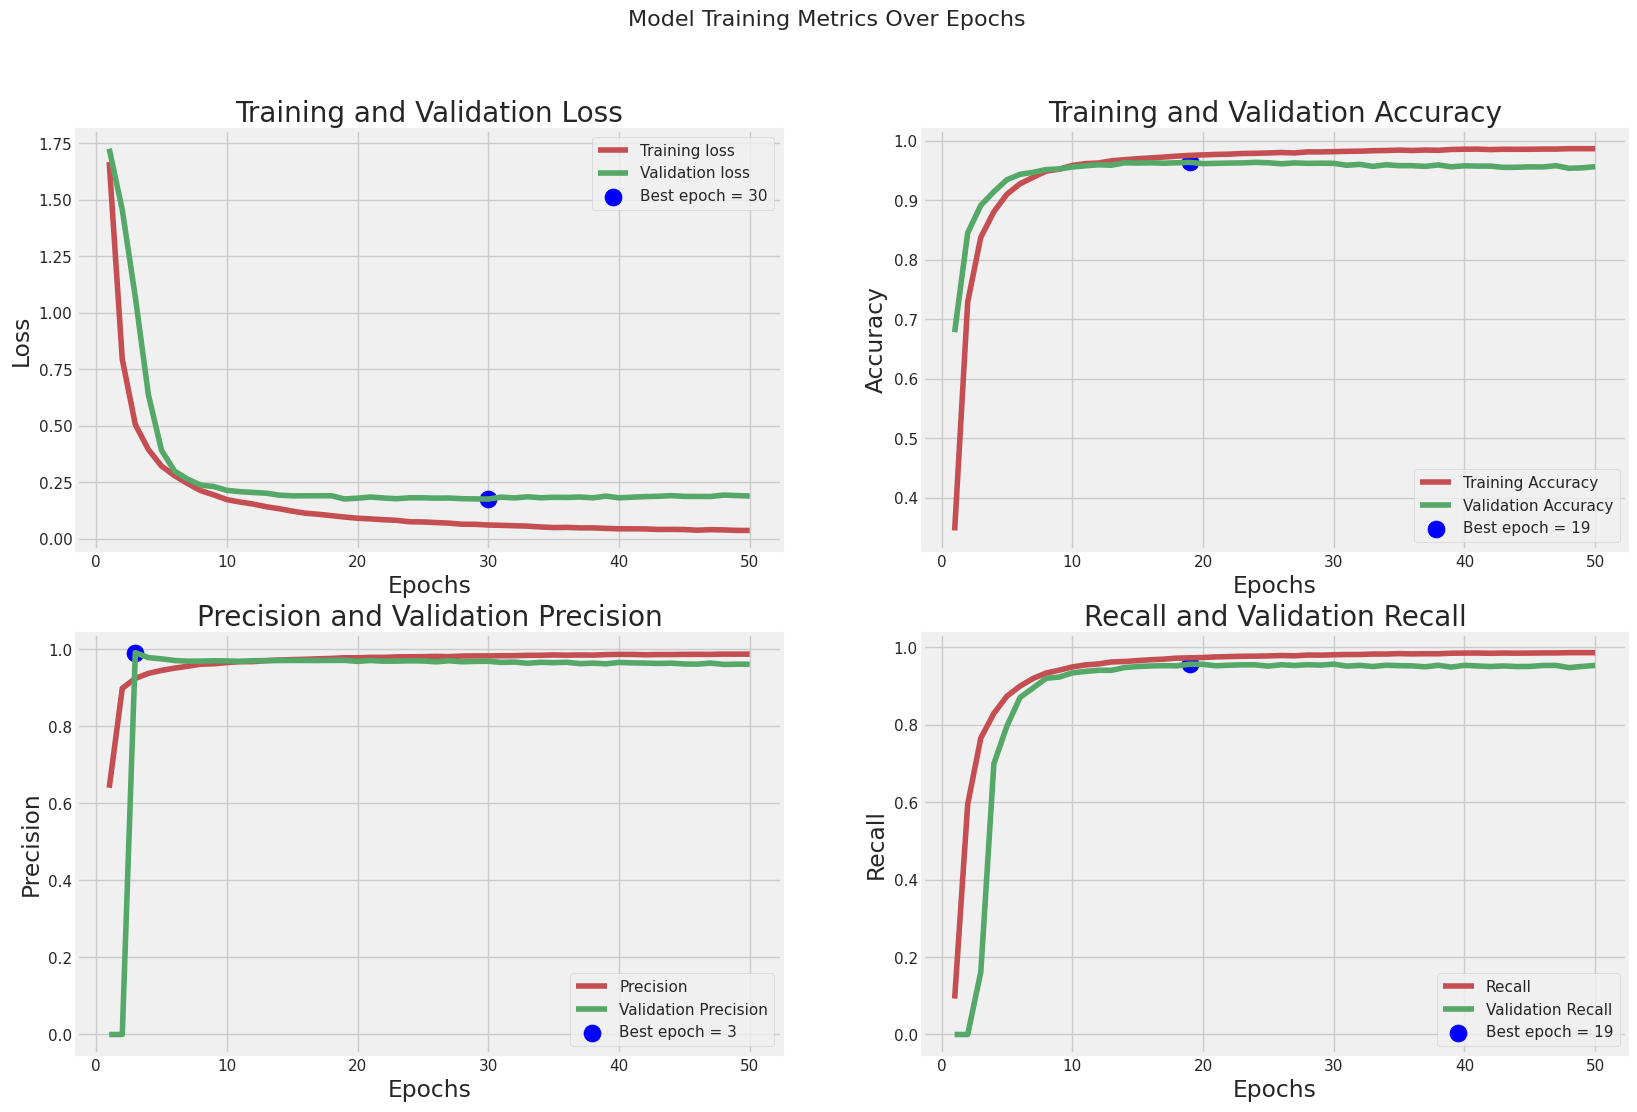

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
tr_per = history.history['precision']
tr_recall = history.history['recall']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_per = history.history['val_precision']
val_recall = history.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

หาดัชนีของค่าที่มีค่าสูงสุดในแต่ละแถว ซึ่งก็คือคลาสที่ถูกทำนาย

y_true ที่เก็บค่าคลาสที่ถูกทำนายจาก ts_y โดยใช้ฟังก์ชัน np.argmax() เพื่อหาดัชนีของค่าที่มากที่สุดในแต่ละแถวของ ts_y ซึ่งก็คือคลาสที่ถูกทำนายสำหรับแต่ละตัวอย่างในชุดข้อมูลทดสอบ

In [ ]:
y_true=[]
for i in range(len(ts_y)):

    x = np.argmax(ts_y[i])
    y_true.append(x)

ใช้ model.predict() เพื่อทำนายผลลัพธ์ของโมเดลบนชุดข้อมูลทดสอบ

y_pred คือรายการของคำทำนายของโมเดลสำหรับแต่ละตัวอย่างในชุดข้อมูลทดสอบ

In [ ]:
preds = model.predict([ts_x, ts_x])
y_pred = np.argmax(preds, axis=1)
y_pred

129/129 [==============================] - 1s 4ms/step


array([4, 0, 0, ..., 4, 0, 3])

ใช้ sns.heatmap() เพื่อพล็อตเมทริกซ์การสับเปลี่ยนคำทำนาย (confusion matrix) ของโมเดลที่ได้รับกำหนดดัชนีความน่าจะเป็นที่ทำนายในแนวแกน x (y_true) และคำทำนายจริงในแนวแกน y (y_pred)

cmap='Blues' จะให้สีของ heatmap ออกมาในโทนของสีฟ้า โดยสีที่เข้มแสดงถึงความแม่นยำของการทำนายที่ดีขึ้น ส่วนสีที่สว่างแสดงถึงความไม่แม่นยำของการทำนาย



*   แกน x (แนวนอน) คือค่าจริง (y_true)
*   แกน y (แนวตั้ง) คือค่าทำนาย (y_pred)



Encoding mapping for train data:
{'anger': 0, 'fear': 1, 'happiness': 2, 'hate': 3, 'joy': 4, 'sadness': 5}

<Axes: >

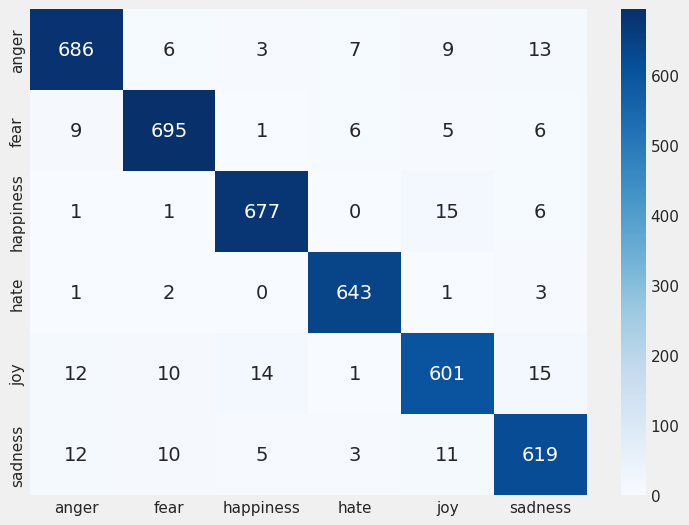

In [ ]:
plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3:'hate', 4:'joy', 5:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

In [ ]:
plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

สรุปผลการประเมินการจำแนกประเภทของโมเดล โดยมีการแสดง precision, recall, f1-score, และ support สำหรับแต่ละคลาส

In [ ]:
clr = classification_report(y_true, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       724
           1       0.96      0.96      0.96       722
           2       0.97      0.97      0.97       700
           3       0.97      0.99      0.98       650
           4       0.94      0.92      0.93       653
           5       0.94      0.94      0.94       660

    accuracy                           0.95      4109
   macro avg       0.95      0.95      0.95      4109
weighted avg       0.95      0.95      0.95      4109



# Save model

เพื่อบันทึกอ็อบเจกต์ tokenizer ลงในไฟล์เพื่อนำไปใช้งานภายหลัง และ model.save() เพื่อบันทึกโมเดลไว้ในรูปแบบของไฟล์ .h5

In [ ]:
import pickle
with open('tokenizer_balanced_ver.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

model.save('nlp_balanced_ver.h5')

# Prediction function

งก์ชัน predict นี้ใช้โมเดลและ tokenizer ที่ถูกบันทึกไว้ในไฟล์ที่ระบุเพื่อทำนายประเภทของข้อความที่ให้เข้ามา

In [ ]:
def predict(text, model_path, token_path):
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    import matplotlib.pyplot as plt
    import pickle
    from tensorflow.keras.models import load_model

    model = load_model(model_path) # โหลดโมเดลจากที่อยู่ที่ระบุใน model_path

    # โหลด tokenizer จากไฟล์ที่อยู่ที่ระบุใน token_path
    # แปลงข้อความที่ให้เข้ามาให้อยู่ในรูปแบบของ sequence ด้วย tokenizer#
    with open(token_path, 'rb') as f:
        tokenizer = pickle.load(f)

    # ทำ padding ข้อมูล sequence เพื่อให้มีความยาวเท่ากันทั้งหมด
    sequences = tokenizer.texts_to_sequences([text])
    x_new = pad_sequences(sequences, maxlen=50)
    # ทำนายประเภทของข้อความที่ให้เข้ามาโดยใช้โมเดล
    predictions = model.predict([x_new, x_new])

    emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3:'hate', 4:'joy', 5:'sadness'}

    label = list(emotions.values())
    probs = list(predictions[0])
    labels = label
    plt.subplot(1, 1, 1)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

ใช้ฟังก์ชัน predict จะทำนายความน่าจะเป็นของแต่ละคลาสสำหรับข้อความที่ให้เข้ามา ซึ่งในที่นี้ข้อความที่ให้มาคือ "I am kill you" จากนั้นจะแสดงผลลัพธ์ในรูปแบบของกราฟแท่งที่แสดงความน่าจะเป็นของแต่ละคลาสที่โมเดลทำนายได้ ดังด้านล่างนี้

1/1 [==============================] - 0s 388ms/step


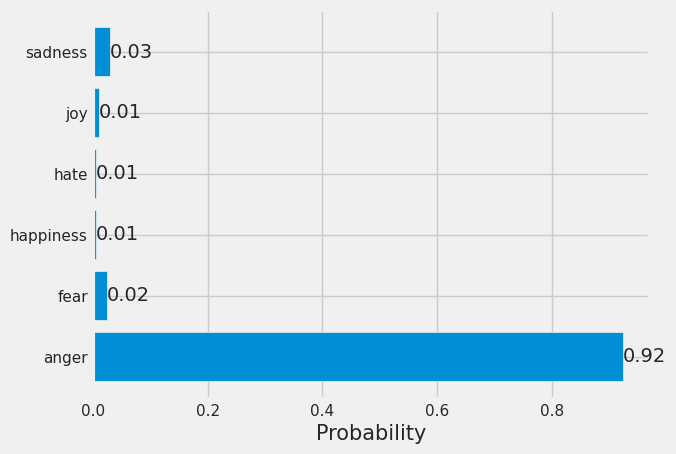

In [ ]:
# txt = 'I am kill you '
txt = 'I am kill you'
predict(txt, '/content/nlp_balanced_ver.h5', '/content/tokenizer_balanced_ver.pkl')

# test

# ประยุกต์ใช้

# ThaiNLP

In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=b2049821be21a5d9cd55f275d73ef157b2cb087f7ac04611256ff15a63ca4a74
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling char

In [ ]:
pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 600.5 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator

# สร้าง DataFrame
df = pd.DataFrame({'Thai': ['หมา', 'แมว']})

# ฟังก์ชันเพื่อแปลภาษา
def translate_text(text, src='th', dest='en'):
    translator = GoogleTranslator(source=src, target=dest)
    return translator.translate(text)

# แปลและเพิ่มผลลัพธ์ในคอลัมน์ใหม่
df['English'] = df['Thai'].apply(translate_text)

print(df)


  Thai English
0  หมา     dog
1  แมว     cat


The product is delivered quickly. The store packs the product well and includes a box of perfume. The perfume has a pleasant scent that isn't pungent.
1/1 [==============================] - 2s 2s/step


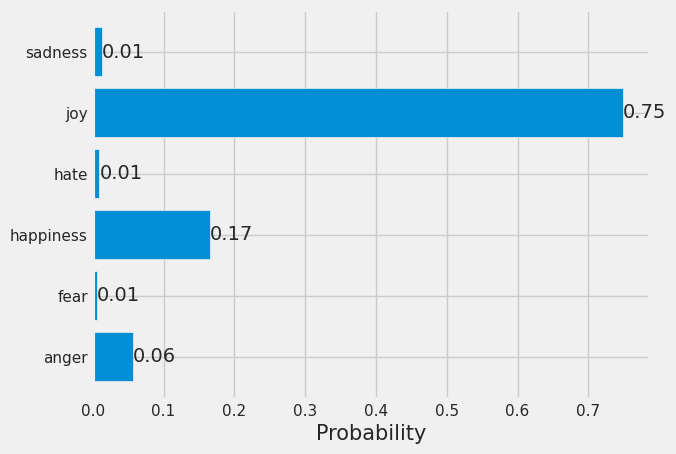

['anger', 'fear', 'happiness', 'hate', 'joy', 'sadness'] [0.056973968, 0.0059157875, 0.16551797, 0.009280282, 0.74900514, 0.013306873]
None


In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model
from deep_translator import GoogleTranslator

# ฟังก์ชันสำหรับแปลข้อความ
def translate_text(text, src='th', dest='en'):
    translator = GoogleTranslator(source=src, target=dest)
    return translator.translate(text)

# ฟังก์ชันสำหรับการทำนาย
def predict(text, model_path, token_path):
    # แปลข้อความเป็นภาษาอังกฤษ
    translated_text = translate_text(text)
    print(translated_text)
    # โหลดโมเดลและ tokenizer
    model = load_model(model_path)
    with open(token_path, 'rb') as handle:
        tokenizer = pickle.load(handle)

    # เตรียมข้อมูลสำหรับทำนาย
    sequences = tokenizer.texts_to_sequences([translated_text])
    padded_seq = pad_sequences(sequences, maxlen=50) # อาจต้องปรับ maxlen ให้ตรงกับที่ใช้ในการฝึกโมเดล

    # ทำนาย
    predictions = model.predict([padded_seq, padded_seq])

    # แสดงผลลัพธ์การทำนาย
    emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3:'hate', 4:'joy', 5:'sadness'}
    label = list(emotions.values())
    probs = list(predictions[0])
    labels = label
    plt.subplot(1, 1, 1)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.show()
    print(labels, probs)

# ตัวอย่างการใช้งาน
text= 'สินค้าจัดส่งรวดเร็วทางร้านแพ็คสินค้ามาดีมีกล่องของน้ำหอม น้ำหอมมีกลิ่นหอมไม่ฉุนค่ะ'
prediction = predict(text, '/content/nlp_balanced_ver.h5', '/content/tokenizer_balanced_ver.pkl')
print(prediction)


# web scraping เพื่อทำ Data collection

sentence	label

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

header1 = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}
cookies = dict(cookie='value')

url = "https://www.rottentomatoes.com/m/the_beast_2023"
req = requests.get(url, headers=header1, cookies=cookies).text

soup = BeautifulSoup(req, 'lxml')

# ค้นหาและดึง HTML element ที่มี attribute reviewquote=
reviewquote_elements = soup.find_all(attrs={"reviewquote": True})

# สร้างรายการเพื่อเก็บข้อมูลที่ดึงได้
comments = []

# วนลูปเพื่อดึงค่าของ attribute reviewquote แต่ละตัว
for element in reviewquote_elements:
    # ดึงค่าของ attribute reviewquote และใช้ split() เพื่อแยกข้อความที่ต้องการออกมา
    reviewquote_value = element["reviewquote"].split("=")[-1]
    comments.append(reviewquote_value)

# สร้าง DataFrame จากข้อมูล comments
df = pd.DataFrame({"comment": comments})


# กำหนดค่าให้กับคอลัมน์ sentence โดยคัดลอกค่าจากคอลัมน์ comment
df['sentence'] = df['comment']

# ลบคอลัมน์ comment ออกจาก DataFrame
df.drop(columns=['comment'], inplace=True)

# สร้างคอลัมน์ label และใส่ค่าเริ่มต้นเป็น None หรือคุณสามารถใส่ค่าอื่นตามที่ต้องการ
df['label'] = None  # หรือใช้ pd.NA หากต้องการใช้การระบุไม่มีข้อมูล (missing data)


# บันทึกเฉพาะคอลัมน์ 'sentence' และ 'label' ลงในไฟล์ Excel
df[['sentence', 'label']].to_excel("movie_comments.xlsx", index=False)

print("บันทึกข้อมูลคอลัมน์ 'sentence' และ 'label' ลงในไฟล์ Excel เรียบร้อย")
df

บันทึกข้อมูลคอลัมน์ 'sentence' และ 'label' ลงในไฟล์ Excel เรียบร้อย


,sentence,label
0,Its devotion to the untamed territory of the h...,None
1,Although the film can be talky and didactic at...,None
2,"It’s a textually dense, formally ambitious, an...",None
3,"The film can be mystifying at time, even confu...",None
4,It’s easier to admire the structural gambit of...,None
5,Bertrand Bonello’s exhilarating cinematic chal...,None
6,"Like Lynch’s best-known work, The Beast has a ...",None
7,Who would predict that this perfectly calibrat...,None
8,Director/co-writer Bertrand Bonello asks for a...,None
9,"I'm not sure I completely understood it, but i...",None


# อินเตอร์เอคทีฟ

In [ ]:
import pandas as pd
import joblib
from deep_translator import GoogleTranslator
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

# ฟังก์ชันสำหรับแปลข้อความ
def translate_text(text, src='th', dest='en'):
    translator = GoogleTranslator(source=src, target=dest)
    return translator.translate(text)


def predict(text, model_path, tokenizer_path):
    # แปลข้อความเป็นภาษาอังกฤษ
    translated_text = translate_text(text)
    # โหลดโมเดลและ tokenizer
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)

    # เตรียมข้อมูลสำหรับทำนาย
    sequences = tokenizer.texts_to_sequences([translated_text])
    padded_seq = pad_sequences(sequences, maxlen=50) # อาจต้องปรับ maxlen ให้ตรงกับที่ใช้ในการฝึกโมเดล

    # ทำนาย
    predictions = model.predict([padded_seq, padded_seq])

    # แสดงผลลัพธ์การทำนาย
    emotions = {0: 'anger', 1: 'fear', 2: 'happiness', 3:'hate', 4:'joy', 5:'sadness'}
    label = list(emotions.values())
    probs = list(predictions[0])
    return label, probs


def interactive_prediction(df):
    print("Available Comments:")
    for i, comment in enumerate(df['comment']):
        print(f"{i + 1}: {comment}")

    choice = int(input("Enter the index of the comment you want to predict (1 to {}): ".format(len(df))))

    if choice < 1 or choice > len(df):
        print("Invalid choice. Please enter a number between 1 and {}.".format(len(df)))
        return

    comment = df.loc[choice - 1, 'comment']
    label, probs = predict(comment, model_path, tokenizer_path)

    print("\nPrediction Results:")
    for emotion, prob in zip(label, probs):
        print(f"{emotion}: {prob:.4f}")

    plt.figure(figsize=(10, 6))
    bars = plt.bar(label, probs, color='skyblue')
    plt.xlabel('Emotion')
    plt.ylabel('Probability')
    plt.title('Emotion Probability Distribution')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # กำหนดเส้นต่อเนื่องให้ค่าระหว่าง 0 และ 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # หาค่า probs ที่สูงสุด
    max_prob_index = probs.index(max(probs))
    max_prob = max(probs)

    # แสดงเปอร์เซ็นต์บนแต่ละบาร์ แต่ข้ามบาร์ที่มีค่าสูงสุด
    for i, prob in enumerate(probs):
        if i != max_prob_index:
            plt.text(i, prob, f'{prob*100:.2f}%', ha='center', va='bottom')

    # แสดงมาร์คบนกราฟ
    plt.annotate(f'Max: {max_prob*100:.2f}%', xy=(max_prob_index, max_prob), xytext=(max_prob_index, max_prob + 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    plt.tight_layout()
    plt.show()

# กำหนดที่อยู่ของโมเดลและโทเคนไนเซอร์
model_path = "/content/nlp_balanced_ver.h5"
tokenizer_path = "/content/tokenizer_balanced_ver.pkl"

# ทำนายสำหรับแต่ละความเห็นและเก็บผลลัพธ์
labels = []
probabilities = []
for text in df['comment']:
    label, probs = predict(text, model_path, tokenizer_path)
    labels.append(label)
    probabilities.append(probs)

# เพิ่มการทำนายเข้าไปใน DataFrame
df['labels'] = labels
df['probs'] = probabilities

# แสดง DataFrame ที่มีการทำนายและสถิติ
print(df.head())


1/1 [==============================] - 0s 176ms/step
                                             comment  \
0  After so many mishandled or abandoned series —...   
1  Until Ghostbusters decides if it wants to thro...   
2  This newest franchise entry is built on nostal...   
3  It's like the scriptwriters just devoured some...   
4  The plot is pretty much a cut-and-paste duplic...   

                                         labels  \
0  [anger, fear, happiness, hate, joy, sadness]   
1  [anger, fear, happiness, hate, joy, sadness]   
2  [anger, fear, happiness, hate, joy, sadness]   
3  [anger, fear, happiness, hate, joy, sadness]   
4  [anger, fear, happiness, hate, joy, sadness]   

                                               probs  
0  [0.0034793997, 0.0853837, 0.069226824, 0.00477...  
1  [0.028119719, 0.29664236, 0.062015295, 0.03810...  
2  [0.004676188, 0.00049684255, 0.015279795, 0.00...  
3  [0.028775709, 0.07540487, 0.04069775, 0.003241...  
4  [0.055646025, 0.02164344,

# เลือกดูการทำนายของแต่ละ comments

Available Comments:
1: After so many mishandled or abandoned series — from “Fantastic Beasts” to “Narnia” to “Percy Jackson” — it’s nice to see one that’s heading in the right direction.
2: Until Ghostbusters decides if it wants to throw its lot in with one era or the other, it’s always going to be between two worlds. And that purgatory makes for a middling experience that doesn’t quite satisfy.
3: This newest franchise entry is built on nostalgia and a stacked cast, but not enough to make it worth watching.
4: It's like the scriptwriters just devoured some plates of Ghostbusters' stuff and went barf... none of it makes any sense. 
5: The plot is pretty much a cut-and-paste duplication of the original film.
6: As scattershot and uneven as it is unnecessary, it fails to effectively build on the foundation laid in Afterlife while at the same time relegating the “old timers” into oddly-integrated super-cameo appearances.
7: Busting makes me feel good. At the end of the day, it’s Ghostbust

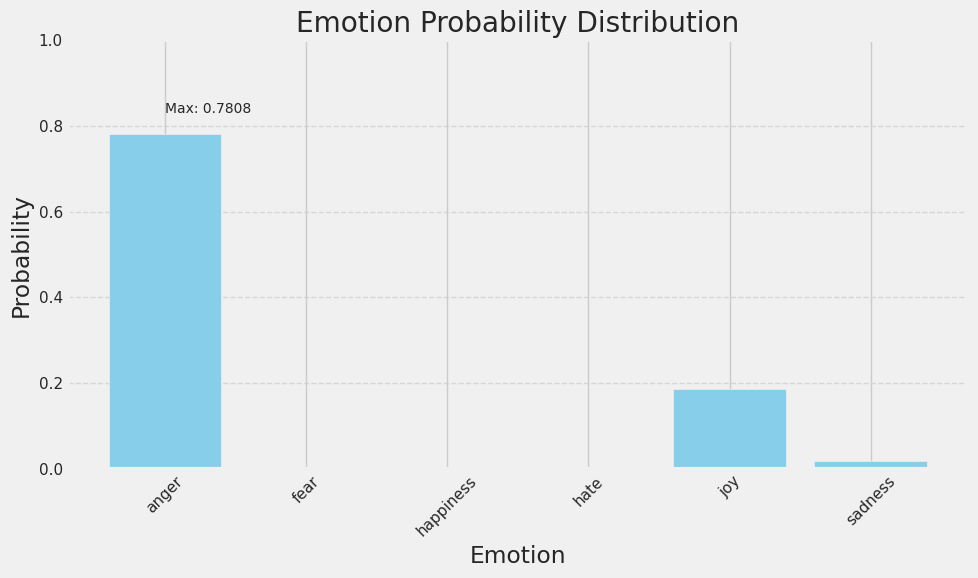

In [ ]:
interactive_prediction(df)

# สร้างรายการหมวดหมู่ตาม label และความคิดเห็นที่ทำนายเข้าไว้ด้วยกัน

In [ ]:
# สร้างรายการหมวดหมู่ตาม label และความคิดเห็นที่ทำนาย
category_comments = {}

for index, row in df.iterrows():
    labels = row['labels']
    comment = row['comment']

    for label in labels:
        if label not in category_comments:
            category_comments[label] = []
        category_comments[label].append(comment)

# แสดงรายการหมวดหมู่และความคิดเห็นที่เกี่ยวข้อง
for label, comments in category_comments.items():
    print(f"Label: {label}")
    for comment in comments:
        print(comment)
    print("------")

Label: anger
After so many mishandled or abandoned series — from “Fantastic Beasts” to “Narnia” to “Percy Jackson” — it’s nice to see one that’s heading in the right direction.
Until Ghostbusters decides if it wants to throw its lot in with one era or the other, it’s always going to be between two worlds. And that purgatory makes for a middling experience that doesn’t quite satisfy.
This newest franchise entry is built on nostalgia and a stacked cast, but not enough to make it worth watching.
It's like the scriptwriters just devoured some plates of Ghostbusters' stuff and went barf... none of it makes any sense. 
The plot is pretty much a cut-and-paste duplication of the original film.
As scattershot and uneven as it is unnecessary, it fails to effectively build on the foundation laid in Afterlife while at the same time relegating the “old timers” into oddly-integrated super-cameo appearances.
Busting makes me feel good. At the end of the day, it’s Ghostbusters, whaddaya want?
While th

# ภาพรวมของหนังเรื่องนี้ที่ผู้คนรู้สึกถึง

           anger      fear     happiness          hate       joy   sadness
0   3.479400e-03  0.085384  6.922682e-02  4.778468e-03  0.142977  0.694155
1   2.811972e-02  0.296642  6.201530e-02  3.810369e-02  0.258831  0.316288
2   4.676188e-03  0.000497  1.527980e-02  5.657379e-03  0.930282  0.043608
3   2.877571e-02  0.075405  4.069775e-02  3.241569e-03  0.706938  0.144942
4   5.564602e-02  0.021643  4.475722e-03  1.966156e-03  0.004167  0.912101
5   3.911272e-02  0.007446  5.994041e-02  3.760917e-03  0.577776  0.311964
6   7.807500e-01  0.005542  5.202298e-03  2.785183e-03  0.187134  0.018587
7   5.182441e-07  0.000104  4.304642e-09  5.532385e-09  0.999774  0.000122
8   3.857709e-02  0.113269  1.010425e-02  2.566977e-02  0.579699  0.232680
9   1.098337e-05  0.002879  9.846020e-01  2.576219e-04  0.011935  0.000316
10  1.540612e-01  0.245942  1.797126e-01  2.294058e-01  0.172995  0.017883
11  2.649010e-02  0.897954  2.323791e-03  1.575397e-04  0.060620  0.012455


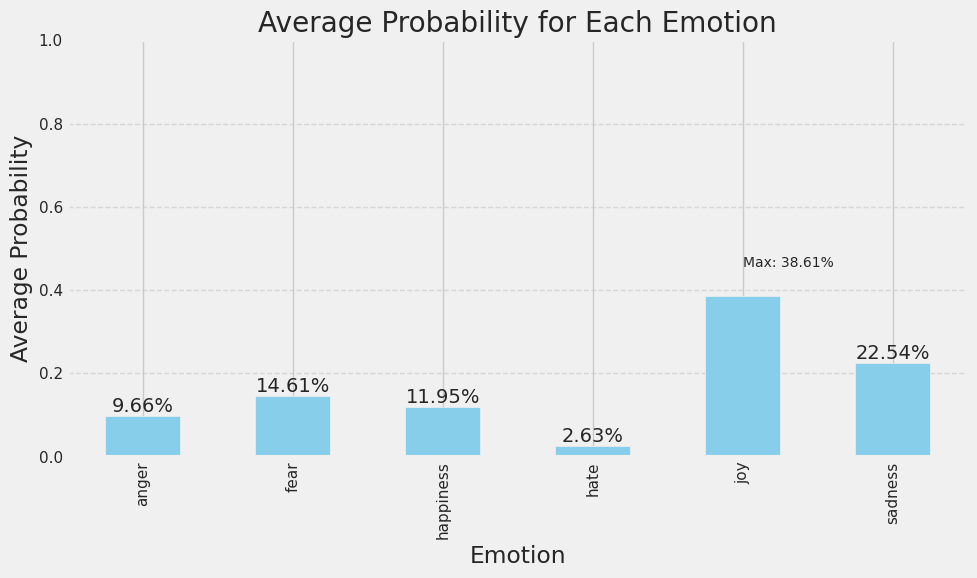

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame สำหรับค่า probs
df_probs = pd.DataFrame(df['probs'].tolist(), columns=['anger', 'fear', 'happiness', 'hate', 'joy', 'sadness'])

# แสดง DataFrame ที่มีแยกค่า probs ตามคลาสของความรู้สึกแล้ว
print(df_probs)

# เฉลี่ยของแต่ละคอลัมน์
column_means = df_probs.mean()

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# พล็อตกราฟ
column_means.plot(kind='bar', color='skyblue')

# หาค่าสูงสุดและชื่อคอลัมน์ที่มีค่าสูงสุด
max_prob = column_means.max()
max_prob_name = column_means.idxmax()
max_prob_index = list(column_means.index).index(max_prob_name)

# เพิ่มคำสั่งสำหรับแสดงเปอร์เซ็นต์บนแต่ละบาร์, ยกเว้นบาร์ที่มีค่าสูงสุด
for i in range(len(column_means)):
    if i != max_prob_index:  # ข้ามคอลัมน์ที่มีลูกศรชี้
        plt.text(i, column_means.iloc[i], f'{column_means.iloc[i]*100:.2f}%', ha='center', va='bottom')

# เพิ่มรายละเอียดกราฟ
plt.title('Average Probability for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Probability')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# แสดงมาร์คบนกราฟ
plt.annotate(f'Max: {max_prob*100:.2f}%', xy=(max_prob_index, max_prob), xytext=(max_prob_index, max_prob + 0.07),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.tight_layout()
plt.show()


# ค้นหาชื่อหนังที่มีคีย์เวิดคล้ายกันหรือเกี่ยวข้องกัน

In [ ]:
import requests
from bs4 import BeautifulSoup

# รับคีย์เวิร์ดจากผู้ใช้
keyword = input("Enter a keyword for the movie: ")

# สร้าง URL สำหรับค้นหา
url = f"https://www.rottentomatoes.com/search?search={keyword}"

# ส่งคำขอ GET ไปยัง Rotten Tomatoes
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# หาชื่อหนังในผลลัพธ์ (ตัวอย่างนี้อาจต้องปรับแต่งให้เข้ากับโครงสร้างของเว็บไซต์)
movies = soup.find_all('search-page-media-row', class_='movie')

for movie in movies:
    title = movie.find('a', class_='movieTitle').text.strip()
    print(title)


Enter a keyword for the movie: Godzilla


In [ ]:
from bs4 import BeautifulSoup
import requests

# URL ของเว็บไซต์ Rotten Tomatoes
url = 'https://www.rottentomatoes.com/'

# ส่งคำร้องขอ GET เพื่อเข้าถึงเนื้อหาของหน้าเว็บ
response = requests.get(url)

# ใช้ BeautifulSoup เพื่อแยกโครงสร้าง HTML
soup = BeautifulSoup(response.text, 'html.parser')

# ค้นหาแท็ก <score-pairs-deprecated> เพื่อดึงข้อมูล
scores = soup.find_all('score-pairs-deprecated')

# เก็บข้อมูล criticsscore และชื่อหนัง
criticsscores = []
movienames = []
for score in scores:
    criticsscore = score.get('criticsscore')
    moviename = score.find_next('span', class_='p--small').text
    if criticsscore:
        criticsscores.append(criticsscore)
        movienames.append(moviename)

# แสดงผลลัพธ์
print("Critic Scores and Movie Names:")
for criticsscore, moviename in zip(criticsscores, movienames):
    print(f"Critic Score: {criticsscore}, Movie Name: {moviename}")


Critic Scores and Movie Names:
Critic Score: 100, Movie Name: Toy Story
Critic Score: 94, Movie Name: Juno
Critic Score: 98, Movie Name: Inside Out
Critic Score: 92, Movie Name: Poor Things
Critic Score: 98, Movie Name: Hamilton
Critic Score: 96, Movie Name: Black Panther
Critic Score: 94, Movie Name: Prey
Critic Score: 93, Movie Name: Star Wars: The Force Awakens
Critic Score: 94, Movie Name: Palm Springs
Critic Score: 96, Movie Name: All of Us Strangers
Critic Score: 94, Movie Name: Civil War
Critic Score: 92, Movie Name: Arcadian
Critic Score: 54, Movie Name: Godzilla x Kong: The New Empire
Critic Score: 88, Movie Name: Monkey Man
Critic Score: 79, Movie Name: The First Omen
Critic Score: 76, Movie Name: Sting
Critic Score: 87, Movie Name: The Beast
Critic Score: 73, Movie Name: The Long Game
Critic Score: 45, Movie Name: Ghostbusters: Frozen Empire
Critic Score: 93, Movie Name: Dune: Part Two
Critic Score: 97, Movie Name: Late Night with the Devil
Critic Score: 82, Movie Name: In t

In [ ]:
from bs4 import BeautifulSoup
import requests

# URL ของเว็บไซต์ Rotten Tomatoes
url = 'https://www.rottentomatoes.com/'

# ให้ผู้ใช้ป้อนค่า % ที่ต้องการ
threshold = float(input("Enter the percentage threshold: "))

# ส่งคำร้องขอ GET เพื่อเข้าถึงเนื้อหาของหน้าเว็บ
response = requests.get(url)

# ใช้ BeautifulSoup เพื่อแยกโครงสร้าง HTML
soup = BeautifulSoup(response.text, 'html.parser')

# ค้นหาแท็ก <score-pairs-deprecated> เพื่อดึงข้อมูล
scores = soup.find_all('score-pairs-deprecated')

# เก็บข้อมูล criticsscore และชื่อหนัง
criticsscores = []
movienames = []
for score in scores:
    criticsscore = score.get('criticsscore')
    moviename = score.find_next('span', class_='p--small').text
    if criticsscore:
        criticsscore = int(criticsscore)  # แปลงเป็นจำนวนเต็ม
        if criticsscore >= threshold:
            criticsscores.append(criticsscore)
            movienames.append(moviename)

# แสดงผลลัพธ์
print(f"Movies with critic scores greater than or equal to {threshold}%:")
for criticsscore, moviename in zip(criticsscores, movienames):
    print(f"Critic Score: {criticsscore}, Movie Name: {moviename}")


Enter the percentage threshold: 80
Movies with critic scores greater than or equal to 80.0%:
Critic Score: 100, Movie Name: Toy Story
Critic Score: 94, Movie Name: Juno
Critic Score: 98, Movie Name: Inside Out
Critic Score: 92, Movie Name: Poor Things
Critic Score: 98, Movie Name: Hamilton
Critic Score: 96, Movie Name: Black Panther
Critic Score: 94, Movie Name: Prey
Critic Score: 93, Movie Name: Star Wars: The Force Awakens
Critic Score: 94, Movie Name: Palm Springs
Critic Score: 96, Movie Name: All of Us Strangers
Critic Score: 94, Movie Name: Civil War
Critic Score: 92, Movie Name: Arcadian
Critic Score: 88, Movie Name: Monkey Man
Critic Score: 87, Movie Name: The Beast
Critic Score: 93, Movie Name: Dune: Part Two
Critic Score: 97, Movie Name: Late Night with the Devil
Critic Score: 82, Movie Name: In the Land of Saints and Sinners
Critic Score: 88, Movie Name: Problemista
Critic Score: 85, Movie Name: Ripley
Critic Score: 81, Movie Name: Sugar
Critic Score: 96, Movie Name: Música
C